9japroperty is a real estate company I work for and needs to predict housing prices for regions in NIgeria. It would be great if I  could somehow create a model that allows 9property  to put in a few features of a house and returns back an estimate of what the house would sell for.
I decide that Linear Regression and Random Forest Regressor might be good paths to solve this problem!
Using some information about a bunch of houses in regions of Nigeria from 9japroperty, it is all in the data set: privatepropertyng5.csv.
The data contains the following columns:
* 'Unnamed: 0': Similar feature to the index
* 'Title': Title of the apartment type
* 'Price': Price that the apartment is sold at
* 'Beds': Number of Bedrooms for each apartment
* 'Location': Location for the apartment
* 'Baths': Number of baths in each apartment
* 'Description': Description of the apartment type
* 'Garage': Number of garage for each apartment


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('privatepropertyng5.csv')
df.head(2)

,Unnamed: 0,Title,Price,Location,Beds,Baths,Description,Garage
0,0,Exquisite And Well Maintained 3 & 4 Bedroom Ap...,"N25,000,000 per year","Ocean Parade, Banana Island, Banana Island, ...",3,5,3 Bedroom Flat & Apartment,0
1,1,Brand new exquisite 4 Bedroom duplex for letti...,"N2,500,000 per year","Ogudu Lagos , Ogudu G.R.A, Ketu",4,5,4 Bedroom Duplex,0


In [3]:
# we notice that 'Unnamed: 0', 'Title' are quite irrelevant
# then we drop them
df.drop(['Title','Unnamed: 0'],axis=1,inplace=True)

# I like my column names in lower case and I ensure that any space between words are replace with '_'
df.columns = df.columns.str.replace('\s+','_').str.lower().str.strip()
df.head(2)

,price,location,beds,baths,description,garage
0,"N25,000,000 per year","Ocean Parade, Banana Island, Banana Island, ...",3,5,3 Bedroom Flat & Apartment,0
1,"N2,500,000 per year","Ogudu Lagos , Ogudu G.R.A, Ketu",4,5,4 Bedroom Duplex,0


In [4]:
# whilst we move into EDA, let's clean the data a little....or much
# all strings in the price column is removed with the 're' module and the column data type is converted to integer
import re
df['price'] = [''.join(re.findall("\d*\.?\d+", item)) for item in df['price']]
df['price'] = pd.to_numeric(df['price'])
df.sample(2)

,price,location,beds,baths,description,garage
1784,4000000,"Lekki, Osapa, Lekki",5,6,5 Bedroom Duplex,0
1427,13000000,Ikoyi,6,6,6 Bedroom House,5


1810000001800002


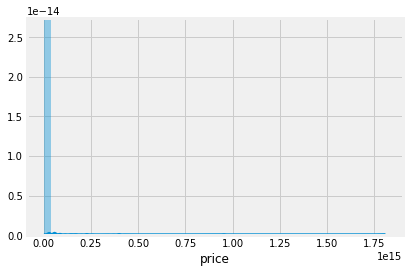

In [5]:
#'price' column data type is successfully coverted to integers!
# let's visualize the 'price'
print(df['price'].max())
sns.distplot(df['price'])

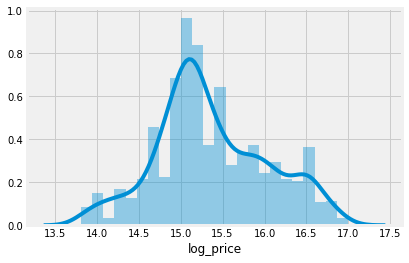

In [6]:
df['log_price'] = np.log(df['price'])
# there are a lot of outliers in 'price' so we remove them
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=50, max_samples='auto', max_features=1.0, contamination=float(0.1)).fit(df[['log_price']])
# df['scores'] = model.decision_function(df[['log_price']])
df['anomaly'] = model.predict(df[['log_price']])
df = df[df['anomaly'] != -1]
sns.distplot(df['log_price'])

In [7]:
# To extract the location, we need to first examine the 'location' column
df['location'].unique()

array(['  Ogudu Lagos , Ogudu G.R.A, Ketu', '  Oniru, Victoria Island',
       '  Ikota, Lekki', '  Off Audu Epkeka, Lekki Phase 1, Lekki',
       '  Ikoyi', '  Agungi, Lekki', '  Phase 2, Lekki Expressway, Lekki',
       '  Lekki Phase 1, Lekki', '  Ikoyi, Parkview Estate, Ikoyi',
       '  Chevron Alternative, Chevron Drive, Lekki',
       '  Orchid Road, Lekki Expressway, Lekki', '  Sangotedo, Ajah',
       '  Town Planning Estate, Ilupeju, Lagos., Ilupeju, Ikorodu Road',
       '  Banana Island, Ikoyi',
       '  Road 6 House 3 Ikota Villa Estate , Ikota, Lekki',
       '  A1 , Banana Island, Ikoyi',
       '  Dan Suleiman Road, Utako, Abuja Phase 2',
       '  Cowrie Creek Lekki., Lekki Expressway, Lekki',
       '  Gowon Estate, Egbeda, Agege',
       '  Nelson Cole Off Iju Road Via Collage Road, Iju , Abeouka Express',
       '  Lekki, Lekki Expressway, Lekki', '  Oral, Ikota, Lekki',
       '  Idado, Lekki', '  Ondo Close, Allen Avenue, Ikeja',
       '  Jabi, Abuja Phase 2', '

In [8]:
# the last three values might give us the exact location we need to help us in our analysis
df['location'] = df['location'].str.lower()
df['location_'] = [location[-3] + ' ' + location[-2] + ' ' + location[-1] for location in df['location'].str.split(' ')]
df['location_'].unique()

array(['ogudu g.r.a, ketu', 'oniru, victoria island', ' ikota, lekki',
       'phase 1, lekki', '  ikoyi', ' agungi, lekki',
       'lekki expressway, lekki', 'parkview estate, ikoyi',
       'chevron drive, lekki', ' sangotedo, ajah',
       'ilupeju, ikorodu road', 'banana island, ikoyi', ', ikota, lekki',
       'abuja phase 2', 'estate, egbeda, agege', ', abeouka express',
       'oral, ikota, lekki', ' idado, lekki', 'allen avenue, ikeja',
       ' maroko, ikoyi', 'bourdillon road, ikoyi', ' victoria island',
       'olowora, omole, ikeja', 'ologolo, ologolo, lekki',
       'gbagada , gbagada', 'road, , ajah', 'magodo shangisha, ketu',
       'lekki, jakande, lekki', 'close, victoria island',
       'ikate elegushi, lekki', 'county, ikota, lekki',
       'old ikoyi, ikoyi', ', medina, gbagada', 'v.i, victoria island',
       'abuja phase 1', 'ikeja g.r.a, ikeja', 'london, osapa, lekki',
       'lekki, ikota, lekki', ', omole, ikeja', 'estate, ikota, lekki',
       'amen estate, aj

In [9]:
"""
ikoyi, banana island, ketu, victoria island, lekki, ajah, ikorodu, abuja, agege, ikeja, gbagada,
oshodi, yaba, ibadan, abeokuta, extension, apapa, 'festac', isolo, port harcourt, 'benin'
"""

"\nikoyi, banana island, ketu, victoria island, lekki, ajah, ikorodu, abuja, agege, ikeja, gbagada,\noshodi, yaba, ibadan, abeokuta, extension, apapa, 'festac', isolo, port harcourt, 'benin'\n"

In [10]:
# locations like banana island in ikoyi differ from ikoyi
n_location = []
mylist = [str(each_location) for each_location in df['location_']]
for each_value in mylist:
    if 'ajah' in each_value:
        n_location.append('ajah')
    elif 'agege' in each_value:
        n_location.append('agege')
    elif 'abuja' in each_value:
        n_location.append('abuja') 
    elif 'banana island' in each_value:
        n_location.append('banana island')
    elif 'gbagada' in each_value:
        n_location.append('gbagada')
    elif 'extension' in each_value:
        n_location.append('extension')
    elif 'lekki' in each_value:
        n_location.append('lekki')
    elif 'ikeja' in each_value:
        n_location.append('ikeja')
    elif 'ikoyi' in each_value:
        n_location.append('ikoyi')
    elif 'ikorodu' in each_value:
        n_location.append('ikorodu')
    elif 'ketu' in each_value:
        n_location.append('ketu')
    elif 'oshodi' in each_value:
        n_location.append('oshodi')
    elif 'victoria island' in each_value:
        n_location.append('victoria island')
    else:
        n_location.append('outside') # let's make locations outside lagos and abuja 'outside'

In [11]:
df['exact_loc'] = n_location
df.sample(5)

,price,location,beds,baths,description,garage,log_price,anomaly,location_,exact_loc
2166,5500000,"old ikoyi, ikoyi",3,3,3 Bedroom Duplex,0,15.520259,1,"old ikoyi, ikoyi",ikoyi
2101,12500000,"old, ikoyi",3,3,3 Bedroom Flat & Apartment,3,16.341239,1,"old, ikoyi",ikoyi
1725,4000000,"adeniyi jones ikeja , ikeja , ikeja",4,5,4 Bedroom Flat & Apartment,0,15.201805,1,"ikeja , ikeja",ikeja
2058,9000000,"nicon town lekki, lekki phase 1, lekki",4,4,4 Bedroom Duplex,0,16.012735,1,"phase 1, lekki",lekki
947,1700000,"lekki phase 1, lekki",1,1,Flat & Apartment,0,14.346139,1,"phase 1, lekki",lekki


In [12]:
# looking at the 'beds' column
df['beds'].unique()

array([      4,       1,       3,       2,      12,       0,       5,
             9,      10,       8,       6, 3500000,       7, 2500000,
            32], dtype=int64)

In [13]:
# we deal with the 'beds' outliers
df[df['beds'] == 3500000]

,price,location,beds,baths,description,garage,log_price,anomaly,location_,exact_loc
674,3500000,"oral estate , ikota, lekki",3500000,4,3500000 Bedroom Duplex,3,15.068274,1,", ikota, lekki",lekki


In [14]:
df.loc[df['beds'] == 3500000, 'beds'] = 4

In [15]:
# we deal with the 'beds' outliers
df[df['beds'] == 2500000]

,price,location,beds,baths,description,garage,log_price,anomaly,location_,exact_loc
957,2500000,"chevron drive, lekki",2500000,3,2500000 Bedroom Flat & Apartment,2,14.731801,1,"chevron drive, lekki",lekki


In [16]:
df.loc[df['beds'] == 2500000, 'beds'] = 4

In [17]:
# we deal with the 'beds' outliers
df[df['beds'] == 32]

,price,location,beds,baths,description,garage,log_price,anomaly,location_,exact_loc
1094,7000000,"off bourdillon, ikoyi",32,30,32 Bedroom Flat & Apartment,0,15.761421,1,"off bourdillon, ikoyi",ikoyi


In [18]:
df.loc[df['beds'] == 32, 'beds'] = 3
df.loc[df['beds'] == 32, 'baths'] = 3 # we also fix the baths

In [19]:
# we deal with the 'beds' outliers
df[df['beds'] == 20]
# since it's an office, we leave it that way

,price,location,beds,baths,description,garage,log_price,anomaly,location_,exact_loc


In [20]:
# we deal with the 'beds' outliers
df[df['beds'] == 10]
# '10-bedroom from the description'

,price,location,beds,baths,description,garage,log_price,anomaly,location_,exact_loc
297,3500000,"oluyole, ibadan",10,5,10 Bedroom Flat & Apartment,0,15.068274,1,"oluyole, ibadan",outside
680,20000000,"lekki right hand side, lekki phase 1, lekki",10,10,10 Bedroom Duplex,0,16.811243,1,"phase 1, lekki",lekki


In [21]:
# we deal with the 'baths' column
df['baths'].unique()

array([ 5,  1,  4,  3,  2, 12,  0,  6,  9, 33,  8, 10,  7, 30, 13],
      dtype=int64)

In [22]:
# we deal with the 'baths' outliers
df[df['baths'] == 30]

,price,location,beds,baths,description,garage,log_price,anomaly,location_,exact_loc
1094,7000000,"off bourdillon, ikoyi",3,30,32 Bedroom Flat & Apartment,0,15.761421,1,"off bourdillon, ikoyi",ikoyi


In [23]:
df.loc[df['baths'] == 30, 'baths'] = 3

In [24]:
# we deal with the 'baths' outliers
df[df['baths'] == 33]

,price,location,beds,baths,description,garage,log_price,anomaly,location_,exact_loc
141,1800000,"osap, osapa, lekki",3,33,3 Bedroom Flat & Apartment,0,14.403297,1,"osap, osapa, lekki",lekki


In [25]:
df.loc[df['baths'] == 33, 'baths'] = 3

In [26]:
# we deal with the 'baths' outliers
df[df['baths'] == 13]

,price,location,beds,baths,description,garage,log_price,anomaly,location_,exact_loc
1836,2250000,"oniru, victoria island",1,13,Flat & Apartment,0,14.626441,1,"oniru, victoria island",victoria island


In [27]:
df.loc[df['baths'] == 13, 'baths'] = 1

In [28]:
# we deal with the 'baths' outliers
df[df['baths'] == 12]

,price,location,beds,baths,description,garage,log_price,anomaly,location_,exact_loc
20,10800000,"town planning estate, ilupeju, lagos., ilupe...",12,12,12 Bedroom Office,0,16.195057,1,"ilupeju, ikorodu road",ikorodu
1802,10800000,"town planning estate, ilupeju, lagos., ilupe...",12,12,12 Bedroom Office,0,16.195057,1,"ilupeju, ikorodu road",ikorodu


In [29]:
# we look at the 'description' column
df['description'].unique()

array(['4 Bedroom Duplex', 'Flat & Apartment', '4 Bedroom Terrace',
       '4 Bedroom Townhouse', '4 Bedroom House', '3 Bedroom Terrace',
       '3 Bedroom Flat & Apartment', '2 Bedroom Flat & Apartment',
       '12 Bedroom Office', '4 Bedroom Flat & Apartment', 'Hotel',
       '3 Bedroom Commercial Property', '5 Bedroom Duplex',
       '3 Bedroom Duplex', 'Commercial Property', '3 Bedroom House',
       'Room or Boys Quarter', '9 Bedroom Duplex', ' 4 Bedroom Terrace',
       '5 Bedroom House', ' 4 Bedroom Flat & Apartment',
       '10 Bedroom Flat & Apartment', '3 Bedroom Bungalow',
       '8 Bedroom Terrace', '6 Bedroom Duplex',
       '3 Bedroom Flat & Apartment\n ', '2 Bedroom Duplex',
       ' 3 Bedroom Flat & Apartment', '4 Bedroom Bungalow',
       ' 4 Bedroom Duplex', 'Office', '5 Bedroom Duplex\n ',
       '3500000 Bedroom Duplex', '4 Bedroom Duplex\n ',
       '10 Bedroom Duplex', '5 Bedroom Terrace', 'Shop',
       '5 Bedroom Flat & Apartment', '7 Bedroom Duplex',
       '2 

In [30]:
# every house, apartment and duplex must have a bedroom so we remove the 'bedroom' and the numbers from the 'description'
df['description'] = df['description'].str.lower().str.strip(' 0123456789\n ').str.replace('bedroom', '').str.lstrip()
df.sample(4)

,price,location,beds,baths,description,garage,log_price,anomaly,location_,exact_loc
1378,15000000,"banana island, ikoyi",3,3,duplex,3,16.523561,1,"banana island, ikoyi",banana island
722,4500000,"ikota villa , ikota, lekki",5,5,duplex,0,15.319588,1,", ikota, lekki",lekki
2662,5000000,"ikeja gra, ikeja , ikeja",4,4,duplex,0,15.424948,1,"ikeja , ikeja",ikeja
1824,4000000,"oral estate , ikota, lekki",4,4,duplex,0,15.201805,1,", ikota, lekki",lekki


In [31]:
df['description'].value_counts()

flat & apartment        1069
duplex                   884
terrace                  199
house                    102
office                    71
commercial property       44
shop                      20
townhouse                 19
bungalow                  14
warehouse                  7
hotel                      4
room or boys quarter       2
Name: description, dtype: int64

In [32]:
X = df[['beds','baths','description','garage','exact_loc']]
y = df['log_price']

In [33]:
# check for multicollinearity
X.corr()

,beds,baths,garage
beds,1.000000,0.939625,0.173689
baths,0.939625,1.000000,0.160149
garage,0.173689,0.160149,1.000000


In [34]:
# 'beds' and 'baths' have a high collinearity, so we drop one of them
X.drop('baths',1,inplace=True)

C:\Users\Charles\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
X = pd.get_dummies(X, drop_first = True)
X.sample(3)

,beds,garage,description_commercial property,description_duplex,description_flat & apartment,description_hotel,description_house,description_office,description_room or boys quarter,description_shop,...,exact_loc_extension,exact_loc_gbagada,exact_loc_ikeja,exact_loc_ikorodu,exact_loc_ikoyi,exact_loc_ketu,exact_loc_lekki,exact_loc_oshodi,exact_loc_outside,exact_loc_victoria island
943,4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2082,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
107,4,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
# we scale the data
y = y.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
y_scaled = StandardScaler().fit_transform(y)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4,random_state=0)

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

In [38]:
model.score(X_test,y_test)

0.579260748684864

In [39]:
model.score(X_train, y_train)

0.6712702081042409

In [40]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)

C:\Users\Charles\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
regressor.score(X_train, y_train)

0.7464869888836058

In [42]:
regressor.score(X_test, y_test)

0.6129951321661963

In [43]:
# adj r_squared
def adj_r2(x,y,model_name):
    r2 = model_name.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    result = 1-(1-r2) * (n-1)/(n-p-1)
    return result

In [44]:
print(f"adjusted R^2 on Linear Regression train data: {adj_r2(X_train, y_train, model)}")
print(f"adjusted R^2 on Linear Regression test data: {adj_r2(X_test, y_test, model)}")
print(f"adjusted R^2 on Random Forest Regressor train data: {adj_r2(X_train, y_train, regressor)}")
print(f"adjusted R^2 on Random Forest Regressor test data: {adj_r2(X_test, y_test, regressor)}")


adjusted R^2 on Linear Regression train data: 0.6653099747783764
adjusted R^2 on Linear Regression test data: 0.5677093014470672
adjusted R^2 on Random Forest Regressor train data: 0.7418905186681063
adjusted R^2 on Random Forest Regressor test data: 0.6023698665234519
